
<img src="index.png">


# Group Project - Open Source Programming 

## (Analyzing Internet Gambling Activities for BTWIN.COM)

Submitted by (Group 9) - 

 - BHURJI Prineet Kaur
 - CAZILHAC Paul
 - ELEDU FAVOUR

In [1]:
options(warn = -1)

In [3]:
# Installing required Libraries
install.packages("https://cran.r-project.org/bin/windows/contrib/3.6/foreign_0.8-76.zip")
install.packages("tidyverse")
install.packages("sas7bdat")
library(tidyverse)
library(sas7bdat)
library(plyr)
library(dplyr)
library(data.table)
library(lubridate)
library(tidyr)
library(foreign)
library(readr)
library(stringr)
library(data.table)
library(haven)
library(readxl)
library(ggplot2)

inferring 'repos = NULL' from 'pkgs'


## Data Importation

In [4]:
Demographic <- read.sas7bdat("RawDataIDemographics.sas7bdat")
Daily_Aggregation <- read.sas7bdat("RawDataIIUserDailyAggregation.sas7bdat")
Poker_Chip_Conversion <- read.sas7bdat("RawDataIIIPokerChipConversions.sas7bdat")
Analytic_Internal_Gabling <- read.sas7bdat("AnalyticDataInternetGambling.sas7bdat")

### Exploring Demographics Table

In [5]:
head(Demographic)

UserID,Country,Language,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,ApplicationID,Gender
1324354,276,2,2005-02-01,20050224,20050224,20050224,NULL,NULL,NULL,3,1
1324355,300,8,2005-02-01,20050201,20050201,20050201,NULL,NULL,20050611,1,1
1324356,276,2,2005-02-01,20050201,20050202,20050202,NULL,NULL,NULL,3,1
1324358,752,1,2005-02-01,20050201,20050201,20050201,NULL,NULL,NULL,1,1
1324360,792,7,2005-02-01,20050202,20050202,20050202,20050203,NULL,NULL,9,1
1324362,276,2,2005-02-01,20050211,20050211,20050211,NULL,NULL,NULL,3,1


Dates are in character value (same as they are in the sas file), so need to rectify them!

In [6]:
# Correcting the Date Formats
Demographic$RegDate<-as.Date(Demographic$RegDate)
Demographic$FirstPay<-as.Date(Demographic$FirstPay,"%Y%m%d")
Demographic$FirstAct<-as.Date(Demographic$FirstAct,"%Y%m%d")
Demographic$FirstSp<-as.Date(Demographic$FirstSp,"%Y%m%d")
Demographic$FirstCa	<-as.Date(Demographic$FirstCa,"%Y%m%d")
Demographic$FirstGa<-as.Date(Demographic$FirstGa,"%Y%m%d")
Demographic$FirstPo<-as.Date(Demographic$FirstPo,"%Y%m%d")

In [7]:
head(Demographic,2)

UserID,Country,Language,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,ApplicationID,Gender
1324354,276,2,2005-02-01,2005-02-24,2005-02-24,2005-02-24,NA,NA,NA,3,1
1324355,300,8,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,2005-06-11,1,1


In [8]:
# Checknig if each of the UserID's are Unique
a<-Demographic %>% 
           group_by(UserID) %>% 
                dplyr ::summarise(count = n())
                                 mean(a$count)                      #It means that each ID is unique in the table 

`summarise()` ungrouping output (override with `.groups` argument)


[1] 1

We imported our external data to replace all encoded values in the Demographic Table

In [9]:
# Reading the country, region and application excel files to get the names into the table
country <- read_excel("country.xlsx")
language <- read_excel("language.xlsx")
application <- read_excel("application.xlsx")

Balancing the Demographic dataset as per the given Analytical Table

In [10]:
# Applied the filter that was applied on the Daily Demographic table and used to create the Analytical table
Demographic <- Demographic %>% 
filter(FirstPay >= as.Date("2005-02-01") & FirstPay <= as.Date("2005-09-30"))

# Now using the above variables for adding columns for CountryName and Description of Language and Application
Demographic <- merge(x = Demographic, y = country, by = "Country", all.x = TRUE)
Demographic <- merge(x = Demographic, y = language, by = "Language", all.x = TRUE)
Demographic <- merge(x = Demographic, y = application,by = "ApplicationID", all.x = TRUE)

# Also assigning values to the Gender column
Demographic$Gender <- ifelse(Demographic$Gender == 0,"Female","Male" )

Checking if any of the variables have missing values

In [11]:
apply(Demographic, 2, function(x) any(is.null(x)))                   # ALL FALSE means no missing Values

ApplicationID        Language         Country          UserID         RegDate 
          FALSE           FALSE           FALSE           FALSE           FALSE 
       FirstPay        FirstAct         FirstSp         FirstCa         FirstGa 
          FALSE           FALSE           FALSE           FALSE           FALSE 
        FirstPo          Gender     CountryName    LanguageName ApplicationName 
          FALSE           FALSE           FALSE           FALSE           FALSE

In [12]:
# Deleting the not required Columns
Demographic$ApplicationID <- NULL
Demographic$Language <- NULL
Demographic$Country <- NULL

head (Demographic)

UserID,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,Gender,CountryName,LanguageName,ApplicationName
1328412,2005-02-02,2005-02-06,2005-02-06,2005-02-06,NA,NA,NA,Male,Germany,English,BETANDWIN.COM
1328922,2005-02-03,2005-07-14,2005-07-14,NA,2005-07-14,NA,NA,Male,Spain,Spanish,BETANDWIN.COM
1355500,2005-02-13,2005-02-13,2005-02-13,2005-02-13,NA,NA,NA,Male,Switzerland,English,BETANDWIN.COM
1396444,2005-02-26,2005-02-26,2005-02-26,2005-02-26,2005-02-26,NA,NA,Male,United Kingdom,English,BETANDWIN.COM
1371247,2005-02-19,2005-08-17,2005-08-17,2005-08-17,2005-08-19,2005-08-28,2005-08-30,Female,Spain,Spanish,BETANDWIN.COM
1395257,2005-02-26,2005-02-26,2005-02-26,2005-02-26,NA,NA,NA,Male,Japan,English,BETANDWIN.COM


Now trying to understand the Time gap between Customer Registration and the First date it starts Playing!

In [13]:
# Creating a new Column and naming it as Activation Period for the Client

Demographic$Activation_Period <- as.Date(Demographic$FirstAct,"%Y%m%d")-as.Date(Demographic$RegDate,"%Y%m%d")

In [14]:
head (Demographic)

UserID,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,Gender,CountryName,LanguageName,ApplicationName,Activation_Period
1328412,2005-02-02,2005-02-06,2005-02-06,2005-02-06,NA,NA,NA,Male,Germany,English,BETANDWIN.COM,4 days
1328922,2005-02-03,2005-07-14,2005-07-14,NA,2005-07-14,NA,NA,Male,Spain,Spanish,BETANDWIN.COM,161 days
1355500,2005-02-13,2005-02-13,2005-02-13,2005-02-13,NA,NA,NA,Male,Switzerland,English,BETANDWIN.COM,0 days
1396444,2005-02-26,2005-02-26,2005-02-26,2005-02-26,2005-02-26,NA,NA,Male,United Kingdom,English,BETANDWIN.COM,0 days
1371247,2005-02-19,2005-08-17,2005-08-17,2005-08-17,2005-08-19,2005-08-28,2005-08-30,Female,Spain,Spanish,BETANDWIN.COM,179 days
1395257,2005-02-26,2005-02-26,2005-02-26,2005-02-26,NA,NA,NA,Male,Japan,English,BETANDWIN.COM,0 days


### Exploring Daily Aggregation Table

In [15]:
head(Daily_Aggregation,2)

UserID,Date,ProductID,Stakes,Winnings,Bets
1324354,20050224,1,20,0,2
1324354,20050225,1,0,0,0


Dates are in character value (same as they are in the sas file), so need to rectify them!

In [16]:
Daily_Aggregation$Date<-as.Date(Daily_Aggregation$Date,"%Y%m%d")

In [17]:
head(Daily_Aggregation)

UserID,Date,ProductID,Stakes,Winnings,Bets
1324354,2005-02-24,1,20,0,2
1324354,2005-02-25,1,0,0,0
1324354,2005-02-27,1,20,0,2
1324354,2005-03-03,1,10,0,1
1324354,2005-03-04,1,10,0,1
1324354,2005-03-05,1,10,0,1


In [18]:
a<-Daily_Aggregation %>% 
           group_by(UserID) %>% 
                   dplyr ::summarise(count = n())
                                    mean(a$count)           #39.68 daily where made in average by each user 

`summarise()` ungrouping output (override with `.groups` argument)


[1] 39.68429

In [19]:
temp<-Daily_Aggregation

In [20]:
temp <- merge(x = temp, y = Demographic[ , c("UserID", "FirstPay")], by = "UserID", all.x=TRUE)

In [21]:
head(temp)

UserID,Date,ProductID,Stakes,Winnings,Bets,FirstPay
1324354,2005-09-13,1,0,0,0,2005-02-24
1324354,2005-09-17,1,0,0,0,2005-02-24
1324354,2005-09-28,1,25,0,4,2005-02-24
1324354,2005-09-16,1,0,220,0,2005-02-24
1324354,2005-09-12,1,200,0,9,2005-02-24
1324354,2005-02-25,1,0,0,0,2005-02-24


Balancing the Aggregation dataset as per the given Analytical Table

In [22]:
# Applied the filter that was applied on the Daily Aggregation tabletable and used to create the Analytical table

temp <- temp %>% 
filter(Date >= FirstPay & Date <= as.Date("2005-09-30") & Date >= as.Date("2005-02-01"))

In [23]:
temp$FirstPay <- NULL
head (temp)

UserID,Date,ProductID,Stakes,Winnings,Bets
1324354,2005-09-13,1,0,0,0
1324354,2005-09-17,1,0,0,0
1324354,2005-09-28,1,25,0,4
1324354,2005-09-16,1,0,220,0
1324354,2005-09-12,1,200,0,9
1324354,2005-02-25,1,0,0,0


Creating New Columns for -  <br/>

1) Days_Ttl = Total number of days a player has played (i.e Loyalty)   <br/>
2) Ttl_Stakes = Total number of Stakes                    <br/>
3) Ttl_ Winnings = Total number of Winnings               <br/>
4) Ttl_Bets = Total number of Bets

In [24]:
test <- as_tibble(temp)

test <-ddply(test,.(UserID),summarize,
                            Days_Ttl = n_distinct(Date),
                            Ttl_Stakes = sum(Stakes),
                            Ttl_Winnings = sum(Winnings),
                            Ttl_Bets = sum(Bets),.drop = FALSE)

In [25]:
head(test)

UserID,Days_Ttl,Ttl_Stakes,Ttl_Winnings,Ttl_Bets
1324354,118,11976.6100,11736.6100,279
1324355,101,425.5600,464.5000,252
1324356,54,1365.2600,910.6600,214
1324358,8,336.2898,209.8575,11
1324360,29,65.7427,43.1573,47
1324362,7,22.0000,0.0000,7


Using the `Days_Ttl` calculated above we now will make `Customer Segments` which shall depict their `Loyalty`

In [26]:
# Checking the Max, Mean & Min values for Days_Ttl inorder to decide the Segment Slabs

In [27]:
max(test$Days_Ttl)

[1] 234

In [28]:
mean(test$Days_Ttl)

[1] 32.66509

In [29]:
min(test$Days_Ttl)

[1] 1

Creating the Customer Segments as per the Total number of Days they have played  -  <br/> <br/>
Less than 50 days - Bronze Category    <br/>
50-75 days - Silver Category    <br/>
75-100 days - Gold Category    <br/>
More than 100 days - Platinum Category   <br/>

In [30]:
test$Segments <- as.factor(ifelse(test$Days_Ttl <= 50,"Bronze",
                         ifelse(test$Days_Ttl <= 75, "Silver",
                         ifelse(test$Days_Ttl <= 100, "Gold",      
                         "Platinum"))))

Daily_Aggregation <- test

In [31]:
head(Daily_Aggregation)

UserID,Days_Ttl,Ttl_Stakes,Ttl_Winnings,Ttl_Bets,Segments
1324354,118,11976.6100,11736.6100,279,Platinum
1324355,101,425.5600,464.5000,252,Platinum
1324356,54,1365.2600,910.6600,214,Silver
1324358,8,336.2898,209.8575,11,Bronze
1324360,29,65.7427,43.1573,47,Bronze
1324362,7,22.0000,0.0000,7,Bronze


### Exploring Poker Chip Conversion Table

In [32]:
head(Poker_Chip_Conversion, 5)

UserID,TransDateTime,TransType,TransAmount
1324355,2005-06-12 00:37:00,124,8.9999
1324355,2005-06-12 00:51:00,124,1.9999
1324355,2005-06-12 01:14:00,124,4.9999
1324355,2005-06-12 02:01:00,24,1.8069
1324355,2005-06-14 23:35:00,124,4.9999


In [33]:
# Cleaning the data to be able to make some analysis on the date and time of the transactions

Poker_Chip_Conversion <- separate(Poker_Chip_Conversion,TransDateTime, c("Date", "Time"),sep =" ")

Poker_Chip_Conversion$Date <- as.Date(Poker_Chip_Conversion$Date)

head (Poker_Chip_Conversion)

UserID,Date,Time,TransType,TransAmount
1324355,2005-06-12,00:37:00,124,8.9999
1324355,2005-06-12,00:51:00,124,1.9999
1324355,2005-06-12,01:14:00,124,4.9999
1324355,2005-06-12,02:01:00,24,1.8069
1324355,2005-06-14,23:35:00,124,4.9999
1324355,2005-06-14,23:45:00,124,4.9999


In [34]:
# To get the hour of the day of transaction from time
Poker_new <- Poker_Chip_Conversion
Poker_new$TransTime <- format(as.POSIXct(Poker_new$Time, format="%H:%M:%S"),"%H")

# To drop the time column
Poker_new <- Poker_new %>%
select (UserID, Date, TransTime, TransType, TransAmount, -Time)  #to get my order back (date, transtime...)

head(Poker_new)

UserID,Date,TransTime,TransType,TransAmount
1324355,2005-06-12,00,124,8.9999
1324355,2005-06-12,00,124,1.9999
1324355,2005-06-12,01,124,4.9999
1324355,2005-06-12,02,24,1.8069
1324355,2005-06-14,23,124,4.9999
1324355,2005-06-14,23,124,4.9999


In order to distinguish between Buying and Selling assigning the values `124` and `24` under Transaction Type as `Sell` and `Buy` 

In [35]:
Poker_new$TransType <- 
  ifelse(Poker_new$TransType == 124, "Sell", "Buy")

head (Poker_new)

UserID,Date,TransTime,TransType,TransAmount
1324355,2005-06-12,00,Sell,8.9999
1324355,2005-06-12,00,Sell,1.9999
1324355,2005-06-12,01,Sell,4.9999
1324355,2005-06-12,02,Buy,1.8069
1324355,2005-06-14,23,Sell,4.9999
1324355,2005-06-14,23,Sell,4.9999


In [36]:
# Finding which Day of the week 
Poker_new$Week_Day <- weekdays(as.Date(Poker_new$Date))
head(Poker_new)

UserID,Date,TransTime,TransType,TransAmount,Week_Day
1324355,2005-06-12,00,Sell,8.9999,Sunday
1324355,2005-06-12,00,Sell,1.9999,Sunday
1324355,2005-06-12,01,Sell,4.9999,Sunday
1324355,2005-06-12,02,Buy,1.8069,Sunday
1324355,2005-06-14,23,Sell,4.9999,Tuesday
1324355,2005-06-14,23,Sell,4.9999,Tuesday


As per the time of the day subsetting the dataset further as - `Morning`, `Afternoon`, `Evening` and `Midnight`

In [37]:
# 06 am - 12 pm Morning 
# 12 pm - 18 pm Afternoon 
# 18 pm - 00 am Evening
# 00 am - 06 am Midnight

Poker_new$MorningTrans <- 
  ifelse(Poker_new$TransTime >= 6 & Poker_new$TransTime < 12, 1, 0)

Poker_new$AfternoonTrans <- 
  ifelse(Poker_new$TransTime >= 12 & Poker_new$TransTime < 18, 1, 0)

Poker_new$EveningTrans <- 
  ifelse(Poker_new$TransTime >= 18 & Poker_new$TransTime < 0, 1, 0)

Poker_new$MidNightTrans <- 
  ifelse(Poker_new$MorningTrans == 0 & Poker_new$AfternoonTrans == 0 & Poker_new$EveningTrans == 0, 1, 0)

head (Poker_new)

UserID,Date,TransTime,TransType,TransAmount,Week_Day,MorningTrans,AfternoonTrans,EveningTrans,MidNightTrans
1324355,2005-06-12,00,Sell,8.9999,Sunday,0,0,0,1
1324355,2005-06-12,00,Sell,1.9999,Sunday,0,0,0,1
1324355,2005-06-12,01,Sell,4.9999,Sunday,0,0,0,1
1324355,2005-06-12,02,Buy,1.8069,Sunday,0,0,0,1
1324355,2005-06-14,23,Sell,4.9999,Tuesday,0,0,0,1
1324355,2005-06-14,23,Sell,4.9999,Tuesday,0,0,0,1


Creating following Variables which will be later used for insights - <br/>
1) Nbr_Days_Played = How many different days has he played   <br/>
2) Most_Played_Month = Which month has the User played the most   <br/>
3) Most_Played_Day = Which Day has User Played the most   <br/>
4) Average and Max Amount Sold and Bought Per User   <br/>
5) Morning_Trans = No of Transactions Done in the Morning   <br/>
6) Afternoon_Trans = No of Transactions Done in the Morning   <br/>
7) Evening_Trans = No of Transactions Done in the Evening    <br/>
8) MidNight_Trans = No of Transactions Done in the Night   <br/>

In [38]:
Poker_new <- as_tibble(Poker_new)

str(Poker_new)
Poker_new$UserID <- as.integer(Poker_new$UserID)

Poker_new <-ddply(Poker_new,.(UserID),summarize,
                                       Nbr_Days_Played = n_distinct(Date),
                                       Most_Played_Month = names(which.max(table(month(Date)))),
                                       Most_Played_Day = names(which.max(table(Week_Day))),
                                       Avg_Sold = mean(TransAmount[TransType == "Sell"]),
                                       Avg_Bought = mean(TransAmount[TransType == "Buy"]),
                                       Max_Sold = max(TransAmount[TransType == "Sell"]),
                                       Max_Bought = max(TransAmount[TransType == "Buy"]),
                                       Morning_Plays = sum(MorningTrans),
                                       Noon_Plays = sum(AfternoonTrans),
                                       Evening_Plays = sum(EveningTrans),
                                       Midnight_Plays = sum(MidNightTrans),.drop = FALSE)

tibble [277,907 x 10] (S3: tbl_df/tbl/data.frame)
 $ UserID        : num [1:277907] 1324355 1324355 1324355 1324355 1324355 ...
 $ Date          : Date[1:277907], format: "2005-06-12" "2005-06-12" ...
 $ TransTime     : chr [1:277907] "00" "00" "01" "02" ...
 $ TransType     : chr [1:277907] "Sell" "Sell" "Sell" "Buy" ...
 $ TransAmount   : num [1:277907] 9 2 5 1.81 5 ...
 $ Week_Day      : chr [1:277907] "Sunday" "Sunday" "Sunday" "Sunday" ...
 $ MorningTrans  : num [1:277907] 0 0 0 0 0 0 0 0 0 0 ...
 $ AfternoonTrans: num [1:277907] 0 0 0 0 0 0 0 0 1 0 ...
 $ EveningTrans  : num [1:277907] 0 0 0 0 0 0 0 0 0 0 ...
 $ MidNightTrans : num [1:277907] 1 1 1 1 1 1 1 1 0 1 ...


In [39]:
head(Poker_new, 2)

UserID,Nbr_Days_Played,Most_Played_Month,Most_Played_Day,Avg_Sold,Avg_Bought,Max_Sold,Max_Bought,Morning_Plays,Noon_Plays,Evening_Plays,Midnight_Plays
1324355,3,6,Sunday,5.13825,4.12965,8.9999,6.4524,0,0,0,8
1324368,23,4,Sunday,136.74117,300.65046,494.9999,805.2394,0,20,0,79


Importing our external data to replace all encoded values in Most played Day column

In [40]:
# Reading the "Days" excel file to get the names into the table

days <- read_excel("days.xlsx")

Poker_new <- merge(x = Poker_new, y = days, by = "Most_Played_Month", all.x = TRUE)

Poker_new$Most_Played_Month <- NULL

In [41]:
# Renaming our above created Column as per our Format used for all variables
Poker_new <- Poker_new %>%
                dplyr::rename(Most_Played_Month = Most_PlayedMonth)

In [42]:
head(Poker_new, 2)

UserID,Nbr_Days_Played,Most_Played_Day,Avg_Sold,Avg_Bought,Max_Sold,Max_Bought,Morning_Plays,Noon_Plays,Evening_Plays,Midnight_Plays,Most_Played_Month
1365785,1,Sunday,14.55495,14.11095,15,14.112,0,3,0,1,Oct
1333298,2,Saturday,8.00000,8.00000,8,8.000,0,0,0,2,Oct


### Analytic_Internal_Gabling 

In [43]:
head(Analytic_Internal_Gabling, 2)

USERID,COUNTRY,LANGUAGE,RegistrationDate,AGE,GENDER,FOTotalStakes,FOTotalWinnings,FOTotalBets,FOFirstActiveDate,FOLastActiveDate,FOTotalDaysActive,LATotalStakes,LATotalWinnings,LATotalBets,LAFirstActiveDate,LALastActiveDate,LATotalDaysActive,FirstSportsActiveDate
1324354,276,2,16468,42,1,10137.33,10224.12,236,16491,16709,97,1839.28,1512.49,43,16560,16705,18,16491
1324355,300,8,16468,22,1,400.86,453.30,231,16468,16708,72,24.70,11.20,21,16468,16474,7,16468


In [44]:
#Format date is sasformat from 1/1/1960
Analytic_Internal_Gabling$RegistrationDate<-as.Date(Analytic_Internal_Gabling$RegistrationDate, '1960-01-01')
Analytic_Internal_Gabling$FOFirstActiveDate<-as.Date(Analytic_Internal_Gabling$FOFirstActiveDate, '1960-01-01')
Analytic_Internal_Gabling$FOLastActiveDate<-as.Date(Analytic_Internal_Gabling$FOLastActiveDate, '1960-01-01')
Analytic_Internal_Gabling$LAFirstActiveDate<-as.Date(Analytic_Internal_Gabling$LAFirstActiveDate, '1960-01-01')
Analytic_Internal_Gabling$LALastActiveDate<-as.Date(Analytic_Internal_Gabling$LALastActiveDate, '1960-01-01')
Analytic_Internal_Gabling$FirstSportsActiveDate<-as.Date(Analytic_Internal_Gabling$FirstSportsActiveDate, '1960-01-01')

In [45]:
head(Analytic_Internal_Gabling,2)

USERID,COUNTRY,LANGUAGE,RegistrationDate,AGE,GENDER,FOTotalStakes,FOTotalWinnings,FOTotalBets,FOFirstActiveDate,FOLastActiveDate,FOTotalDaysActive,LATotalStakes,LATotalWinnings,LATotalBets,LAFirstActiveDate,LALastActiveDate,LATotalDaysActive,FirstSportsActiveDate
1324354,276,2,2005-02-01,42,1,10137.33,10224.12,236,2005-02-24,2005-09-30,97,1839.28,1512.49,43,2005-05-04,2005-09-26,18,2005-02-24
1324355,300,8,2005-02-01,22,1,400.86,453.30,231,2005-02-01,2005-09-29,72,24.70,11.20,21,2005-02-01,2005-02-07,7,2005-02-01


Renaming all the Column Names to make them more Readable!

In [46]:
 Analytics_Table <- Analytic_Internal_Gabling %>%
                        dplyr::rename(UserID = USERID, Country = COUNTRY, Language = LANGUAGE, Age = AGE, Gender = GENDER)

In [47]:
head(Analytics_Table,2)

UserID,Country,Language,RegistrationDate,Age,Gender,FOTotalStakes,FOTotalWinnings,FOTotalBets,FOFirstActiveDate,FOLastActiveDate,FOTotalDaysActive,LATotalStakes,LATotalWinnings,LATotalBets,LAFirstActiveDate,LALastActiveDate,LATotalDaysActive,FirstSportsActiveDate
1324354,276,2,2005-02-01,42,1,10137.33,10224.12,236,2005-02-24,2005-09-30,97,1839.28,1512.49,43,2005-05-04,2005-09-26,18,2005-02-24
1324355,300,8,2005-02-01,22,1,400.86,453.30,231,2005-02-01,2005-09-29,72,24.70,11.20,21,2005-02-01,2005-02-07,7,2005-02-01


In [48]:
# Improving the number encodings in the Columns of Analytics Table by replacing them with more interpretable names

Analytics_Table <- merge(x = Analytics_Table, y = language, by = "Language", all.x = TRUE)

Analytics_Table <- merge(x = Analytics_Table, y = country, by = "Country", all.x = TRUE)

Analytics_Table$Gender <- ifelse(Analytics_Table$Gender == 0,"Female","Male" )

In [49]:
Analytics_Table$Country <- Analytics_Table$Language <- NULL 

In [50]:
head(Analytics_Table, 2)

UserID,RegistrationDate,Age,Gender,FOTotalStakes,FOTotalWinnings,FOTotalBets,FOFirstActiveDate,FOLastActiveDate,FOTotalDaysActive,LATotalStakes,LATotalWinnings,LATotalBets,LAFirstActiveDate,LALastActiveDate,LATotalDaysActive,FirstSportsActiveDate,LanguageName,CountryName
1329937,2005-02-03,33,Male,4818.01,3302.36,451,2005-02-08,2005-07-28,13,11456.63,11311.84,162,2005-02-09,2005-07-27,13,2005-02-08,Italian,Albania
1399049,2005-02-27,35,Male,1059.27,1121.68,181,2005-03-21,2005-06-05,23,890.76,758.35,111,2005-04-24,2005-05-07,12,2005-03-21,German,Albania


# EXPLORING THE PRODUCTS

SPORTS

Creating following Variables which will be later used for insights - <br/>
1) Sum_Stakes_Sp = Total numbers of Stakes for Sports   <br/>
2) Avg_Stakes_Sp = Average number of Stakes for Sports    <br/>
3) Sum_Winnings_Sp = Total number of Winnings for Sports    <br/>
4) Avg_Winnings_Sp = Average number of Winnings for Sports    <br/>
5) Total_Bets_Sp = Total number of Bets for Sports    <br/>
6) Nbr_Days_Played_Sp = Total number of Days Sports has been played    <br/>
7) Most_Played_Month_Sp = The month for which maximum plays happened    <br/>
8) Most_Played_Day_Sp = The weekday for which maximum plays happened    <br/>

In [51]:
# summary stats for Sports products (fixed odds, and live action)

DailyAggr_Sports <- temp %>% 
                        filter(ProductID == 1 | ProductID == 2)

DailyAggregation_Sp<-ddply(DailyAggr_Sports,.(UserID),summarize,
                                 Sum_Stakes_Sp = round(sum(Stakes),1),  
                                 Avg_Stakes_Sp = round(mean(Stakes),1),
                                 Sum_Winnings_Sp = round(sum(Winnings),1),
                                 Avg_Winnings_Sp = round(mean(Winnings),1),
                                 Total_Bets_Sp = round(sum(Bets),1), 
                                 Nbr_Days_Played_Sp = n_distinct(Date),
                                 Most_Played_Month_Sp = names(which.max(table(month(as.Date(Date,format="%Y%m%d"))))),
                                 Most_Played_Day_Sp = names(which.max(table(weekdays(as.Date(Date))))), 
                                 .drop = FALSE)

In [52]:
head(DailyAggregation_Sp, 2)

UserID,Sum_Stakes_Sp,Avg_Stakes_Sp,Sum_Winnings_Sp,Avg_Winnings_Sp,Total_Bets_Sp,Nbr_Days_Played_Sp,Most_Played_Month_Sp,Most_Played_Day_Sp
1324354,11976.6,88.1,11736.6,86.3,279,118,4,Saturday
1324355,425.6,4.0,464.5,4.4,252,101,2,Wednesday


CASINO

Creating following Variables which will be later used for insights - <br/>
1) Sum_Stakes_Ca = Total numbers of Stakes for Casino   <br/>
2) Avg_Stakes_Ca = Average number of Stakes for Casino     <br/>
3) Sum_Winnings_Ca = Total number of Winnings for Casino     <br/>
4) Avg_Winnings_Ca = Average number of Winnings for Casino     <br/>
5) Total_Bets_Ca = Total number of Bets for Casino     <br/>
6) Nbr_Days_Played_Ca = Total number of Days Casino  has been played    <br/>
7) Most_Played_Month_Ca = The month for which maximum plays happened    <br/>
8) Most_Played_Day_Ca = The weekday for which maximum plays happened    <br/>

In [53]:
DailyAggr_Casino <- temp %>% 
                        filter(ProductID == 4 | ProductID == 8)

DailyAggregation_Ca<-ddply(DailyAggr_Casino,.(UserID),summarize,
                                 Sum_Stakes_Ca = round(sum(Stakes),1),  
                                 Avg_Stakes_Ca = round(mean(Stakes),1),
                                 Sum_Winnings_Ca = round(sum(Winnings),1),
                                 Avg_Winnings_Ca = round(mean(Winnings),1),
                                 Total_Bets_Ca = round(sum(Bets),1), 
                                 Nbr_Days_Played_Ca = n_distinct(Date),
                                 Most_Played_Month_Ca = names(which.max(table(month(as.Date(Date,format="%Y%m%d"))))),
                                 Most_Played_Day_Ca = names(which.max(table(weekdays(as.Date(Date))))), 
                                 .drop = FALSE)

In [54]:
head(DailyAggregation_Ca, 2)

UserID,Sum_Stakes_Ca,Avg_Stakes_Ca,Sum_Winnings_Ca,Avg_Winnings_Ca,Total_Bets_Ca,Nbr_Days_Played_Ca,Most_Played_Month_Ca,Most_Played_Day_Ca
1324360,4,4,2.0,2.0,4,1,2,Thursday
1324363,234,78,181.5,60.5,139,3,2,Friday


GAMES

Creating following Variables which will be later used for insights - <br/>
1) Sum_Stakes_Ga = Total numbers of Stakes for Games   <br/>
2) Avg_Stakes_Ga = Average number of Stakes for Games     <br/>
3) Sum_Winnings_Ga = Total number of Winnings for Games     <br/>
4) Avg_Winnings_Ga = Average number of Winnings for Games     <br/>
5) Total_Bets_Ga = Total number of Bets for Games     <br/>
6) Nbr_Days_Played_Ga = Total number of Days Games  has been played    <br/>
7) Most_Played_Month_Ga = The month for which maximum plays happened    <br/>
8) Most_Played_Day_Ga = The weekday for which maximum plays happened    <br/>

In [55]:
DailyAggr_Games <- temp %>% 
                       filter(ProductID == 5 | ProductID == 6 | ProductID == 7)

DailyAggregation_Ga<-ddply(DailyAggr_Games,.(UserID),summarize,
                                 Sum_Stakes_Ga = round(sum(Stakes),1),  
                                 Avg_Stakes_Ga = round(mean(Stakes),1),
                                 Sum_Winnings_Ga = round(sum(Winnings),1),
                                 Avg_Winnings_Ga = round(mean(Winnings),1),
                                 Total_Bets_Ga = round(sum(Bets),1), 
                                 Nbr_Days_Played_Ga = n_distinct(Date),
                                 Most_Played_Month_Ga = names(which.max(table(month(as.Date(Date,format="%Y%m%d"))))),
                                 Most_Played_Day_Ga = names(which.max(table(weekdays(as.Date(Date))))), 
                                 .drop = FALSE)

In [56]:
head(DailyAggregation_Ga, 2)

UserID,Sum_Stakes_Ga,Avg_Stakes_Ga,Sum_Winnings_Ga,Avg_Winnings_Ga,Total_Bets_Ga,Nbr_Days_Played_Ga,Most_Played_Month_Ga,Most_Played_Day_Ga
1324368,1.0,1.0,0.0,0.0,1,1,8,Sunday
1324369,10.8,3.6,4.9,1.6,9,3,2,Saturday


# CREATING THE DATA MART

In [57]:
# We are keeping only the column of interest for the 4 categories of Plays to construct our DataMart

Sports <- DailyAggregation_Sp[,c("UserID", "Sum_Stakes_Sp", "Avg_Stakes_Sp", "Sum_Winnings_Sp", "Avg_Winnings_Sp", 
                                 "Total_Bets_Sp", "Nbr_Days_Played_Sp", "Most_Played_Month_Sp", "Most_Played_Day_Sp")]
                            
Casino <- DailyAggregation_Ca[,c("UserID", "Sum_Stakes_Ca", "Avg_Stakes_Ca", "Sum_Winnings_Ca", "Avg_Winnings_Ca", 
                                 "Total_Bets_Ca", "Nbr_Days_Played_Ca", "Most_Played_Month_Ca", "Most_Played_Day_Ca")]

Games <- DailyAggregation_Ga[,c("UserID", "Sum_Stakes_Ga", "Avg_Stakes_Ga", "Sum_Winnings_Ga", "Avg_Winnings_Ga", 
                                 "Total_Bets_Ga", "Nbr_Days_Played_Ga", "Most_Played_Month_Ga", "Most_Played_Day_Ga")]

Poker <- Poker_new[,c("UserID","Nbr_Days_Played","Most_Played_Day","Most_Played_Month","Avg_Sold","Avg_Bought", 
                       "Max_Sold","Max_Bought","Morning_Plays", "Noon_Plays", "Evening_Plays", "Midnight_Plays")]

Sports_Analytics <- Analytics_Table[,c("UserID","Age","FOTotalStakes", "FOTotalWinnings", "FOTotalBets",
                            "FOTotalDaysActive","LATotalStakes","LATotalWinnings","LATotalBets","LATotalDaysActive")]

In [58]:
# Merging Sports with Sports Analytics to have an overall summary of Sports data (including FO and LA)
Sports_Complete <- merge(x=Sports_Analytics, y=Sports, by = "UserID", all.x = T)

In [59]:
head(Demographic,2)

UserID,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,Gender,CountryName,LanguageName,ApplicationName,Activation_Period
1328412,2005-02-02,2005-02-06,2005-02-06,2005-02-06,NA,NA,NA,Male,Germany,English,BETANDWIN.COM,4 days
1328922,2005-02-03,2005-07-14,2005-07-14,NA,2005-07-14,NA,NA,Male,Spain,Spanish,BETANDWIN.COM,161 days


In [60]:
q        <- merge(x=Demographic, y=Sports_Complete, by = "UserID", all.x = T)
r        <- merge(x=q, y=Poker, by = "UserID", all.x = T)
s        <- merge(x=r, y=Games, by = "UserID", all.x = T)
t        <- merge(x=s, y=Casino, by = "UserID", all.x = T)
Datamart <- t

head(Datamart)

UserID,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,Gender,CountryName,...,Most_Played_Month_Ga,Most_Played_Day_Ga,Sum_Stakes_Ca,Avg_Stakes_Ca,Sum_Winnings_Ca,Avg_Winnings_Ca,Total_Bets_Ca,Nbr_Days_Played_Ca,Most_Played_Month_Ca,Most_Played_Day_Ca
1324354,2005-02-01,2005-02-24,2005-02-24,2005-02-24,NA,NA,NA,Male,Germany,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1324355,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,2005-06-11,Male,Greece,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1324356,2005-02-01,2005-02-01,2005-02-02,2005-02-02,NA,NA,NA,Male,Germany,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1324358,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,NA,Male,Sweden,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1324360,2005-02-01,2005-02-02,2005-02-02,2005-02-02,2005-02-03,NA,NA,Male,Turkey,...,NA,NA,4,4,2,2,4,1,2,Thursday
1324362,2005-02-01,2005-02-11,2005-02-11,2005-02-11,NA,NA,NA,Male,Germany,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Replacing all `NAN` or `NA` values in our Datamart with `0` (except for Dates)

In [61]:
Datamart$LATotalBets[is.na(Datamart$LATotalBets)] = 0
Datamart$LATotalDaysActive[is.na(Datamart$LATotalDaysActive)] = 0
Datamart$Nbr_Days_Played[is.na(Datamart$Nbr_Days_Played)] = 0
Datamart$Most_Played_Day [is.na(Datamart$Most_Played_Day )] = 0
Datamart$Most_Played_Month[is.na(Datamart$Most_Played_Month)] = 0
Datamart$Avg_Sold[is.na(Datamart$Avg_Sold)] = 0
Datamart$Avg_Bought[is.na(Datamart$Avg_Bought)] = 0
Datamart$Max_Sold[is.na(Datamart$Max_Sold)] = 0
Datamart$Max_Bought[is.na(Datamart$Max_Bought)] = 0
Datamart$Morning_Plays[is.na(Datamart$Morning_Plays)] = 0
Datamart$Noon_Plays[is.na(Datamart$Noon_Plays)] = 0
Datamart$Evening_Plays[is.na(Datamart$Evening_Plays)] = 0
Datamart$Midnight_Plays[is.na(Datamart$Midnight_Plays)] = 0
Datamart$Sum_Stakes_Ga[is.na(Datamart$Sum_Stakes_Ga)] = 0
Datamart$Avg_Stakes_Ga[is.na(Datamart$Avg_Stakes_Ga)] = 0
Datamart$Sum_Winnings_Ga[is.na(Datamart$Sum_Winnings_Ga)] = 0
Datamart$Avg_Winnings_Ga[is.na(Datamart$Avg_Winnings_Ga)] = 0
Datamart$Total_Bets_Ga[is.na(Datamart$Total_Bets_Ga)] = 0
Datamart$Nbr_Days_Played_Ga[is.na(Datamart$Nbr_Days_Played_Ga)] = 0
Datamart$Most_Played_Month_Ga[is.na(Datamart$Most_Played_Month_Ga)] = 0
Datamart$Most_Played_Day_Ga[is.na(Datamart$Most_Played_Day_Ga)] = 0
Datamart$Most_Played_Day_Ga[is.na(Datamart$Most_Played_Day_Ga)] = 0
Datamart$Sum_Stakes_Ca[is.na(Datamart$Sum_Stakes_Ca)] = 0
Datamart$Avg_Stakes_Ca[is.na(Datamart$Avg_Stakes_Ca)] = 0
Datamart$Sum_Winnings_Ca[is.na(Datamart$Sum_Winnings_Ca)] = 0
Datamart$Avg_Winnings_Ca[is.na(Datamart$Avg_Winnings_Ca)] = 0
Datamart$Total_Bets_Ca[is.na(Datamart$Total_Bets_Ca)] = 0
Datamart$Nbr_Days_Played_Ca[is.na(Datamart$Nbr_Days_Played_Ca)] = 0
Datamart$Most_Played_Month_Ca[is.na(Datamart$Most_Played_Month_Ca)] = 0
Datamart$Most_Played_Day_Ca[is.na(Datamart$Most_Played_Day_Ca)] = 0

In [62]:
head(Datamart)

UserID,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,Gender,CountryName,...,Most_Played_Month_Ga,Most_Played_Day_Ga,Sum_Stakes_Ca,Avg_Stakes_Ca,Sum_Winnings_Ca,Avg_Winnings_Ca,Total_Bets_Ca,Nbr_Days_Played_Ca,Most_Played_Month_Ca,Most_Played_Day_Ca
1324354,2005-02-01,2005-02-24,2005-02-24,2005-02-24,NA,NA,NA,Male,Germany,...,0,0,0,0,0,0,0,0,0,0
1324355,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,2005-06-11,Male,Greece,...,0,0,0,0,0,0,0,0,0,0
1324356,2005-02-01,2005-02-01,2005-02-02,2005-02-02,NA,NA,NA,Male,Germany,...,0,0,0,0,0,0,0,0,0,0
1324358,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,NA,Male,Sweden,...,0,0,0,0,0,0,0,0,0,0
1324360,2005-02-01,2005-02-02,2005-02-02,2005-02-02,2005-02-03,NA,NA,Male,Turkey,...,0,0,4,4,2,2,4,1,2,Thursday
1324362,2005-02-01,2005-02-11,2005-02-11,2005-02-11,NA,NA,NA,Male,Germany,...,0,0,0,0,0,0,0,0,0,0


Now we will merge our `Datamart` with the `Daily_Aggregation`

In [63]:
Datamart <- merge(x=Datamart, y=Daily_Aggregation, by = "UserID", all.x = T)

In [64]:
head(Datamart,2)

UserID,RegDate,FirstPay,FirstAct,FirstSp,FirstCa,FirstGa,FirstPo,Gender,CountryName,...,Avg_Winnings_Ca,Total_Bets_Ca,Nbr_Days_Played_Ca,Most_Played_Month_Ca,Most_Played_Day_Ca,Days_Ttl,Ttl_Stakes,Ttl_Winnings,Ttl_Bets,Segments
1324354,2005-02-01,2005-02-24,2005-02-24,2005-02-24,NA,NA,NA,Male,Germany,...,0,0,0,0,0,118,11976.61,11736.61,279,Platinum
1324355,2005-02-01,2005-02-01,2005-02-01,2005-02-01,NA,NA,2005-06-11,Male,Greece,...,0,0,0,0,0,101,425.56,464.50,252,Platinum


In [65]:
# Checking the Final Columns in our DataMart and their Total Count
colnames(Datamart)
length(colnames(Datamart))

[1] "UserID"               "RegDate"              "FirstPay"            
 [4] "FirstAct"             "FirstSp"              "FirstCa"             
 [7] "FirstGa"              "FirstPo"              "Gender"              
[10] "CountryName"          "LanguageName"         "ApplicationName"     
[13] "Activation_Period"    "Age"                  "FOTotalStakes"       
[16] "FOTotalWinnings"      "FOTotalBets"          "FOTotalDaysActive"   
[19] "LATotalStakes"        "LATotalWinnings"      "LATotalBets"         
[22] "LATotalDaysActive"    "Sum_Stakes_Sp"        "Avg_Stakes_Sp"       
[25] "Sum_Winnings_Sp"      "Avg_Winnings_Sp"      "Total_Bets_Sp"       
[28] "Nbr_Days_Played_Sp"   "Most_Played_Month_Sp" "Most_Played_Day_Sp"  
[31] "Nbr_Days_Played"      "Most_Played_Day"      "Most_Played_Month"   
[34] "Avg_Sold"             "Avg_Bought"           "Max_Sold"            
[37] "Max_Bought"           "Morning_Plays"        "Noon_Plays"          
[40] "Evening_Plays"        "Midnight_Plays"       "Sum_Stakes_Ga"       
[43] "Avg_Stakes_Ga"        "Sum_Winnings_Ga"      "Avg_Winnings_Ga"     
[46] "Total_Bets_Ga"        "Nbr_Days_Played_Ga"   "Most_Played_Month_Ga"
[49] "Most_Played_Day_Ga"   "Sum_Stakes_Ca"        "Avg_Stakes_Ca"       
[52] "Sum_Winnings_Ca"      "Avg_Winnings_Ca"      "Total_Bets_Ca"       
[55] "Nbr_Days_Played_Ca"   "Most_Played_Month_Ca" "Most_Played_Day_Ca"  
[58] "Days_Ttl"             "Ttl_Stakes"           "Ttl_Winnings"        
[61] "Ttl_Bets"             "Segments"

[1] 62

In [66]:
# Exporting our DataMart to CSV File 
write.csv(Datamart,"Datamart.csv", row.names = FALSE)

In [67]:
# For Saving in French Style
# write.csv2(Datamart,"Datamarts.csv", row.names = FALSE)

# NOW LET'S START THE BUSINESS INSIGHTS PART!

From all the above derived variables we have made to form the final DataMart, we will now try to correlated and find trends. These can help the Marketing Analyst Teams to make informed decisions in terms of Customer Targeting & Market Growth Strategies.

## PLOT1  (Player "AGE" Distribution Graph)

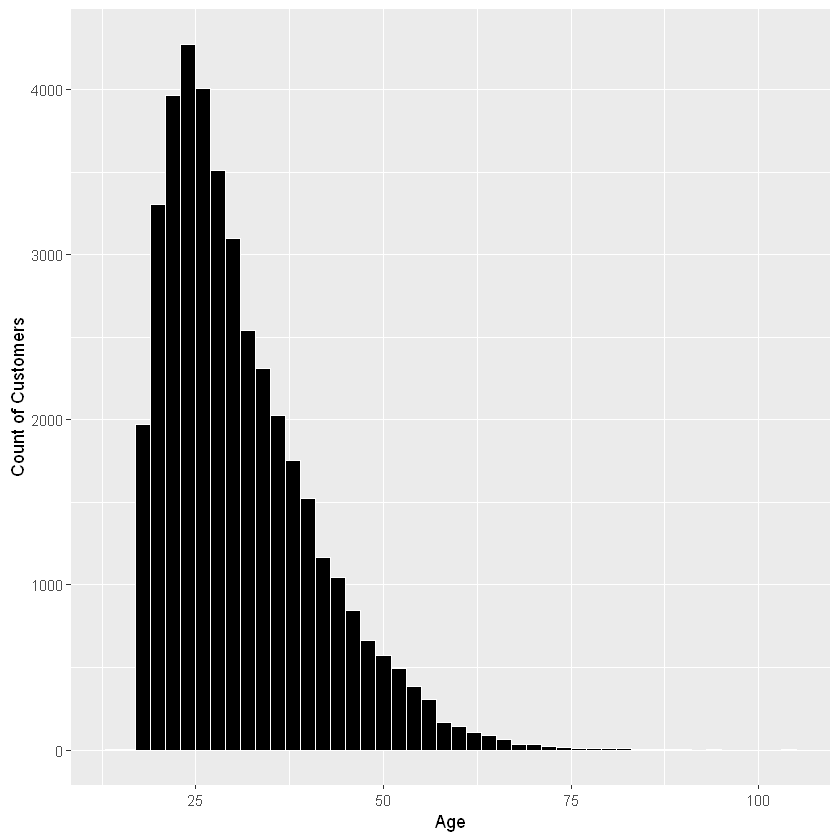

In [68]:
plot1 <- ggplot(Datamart,aes(x = Age)) +
          geom_histogram(binwidth = 2,color="white", fill="black") + 
               ylab("Count of Customers")

plot1

## PLOT2 (Player "GENDER" Distribution Graph)

In [69]:
# Removing NA values from Gender
Gender_new <- subset(Datamart, (!is.na(Datamart[,"Gender"])))

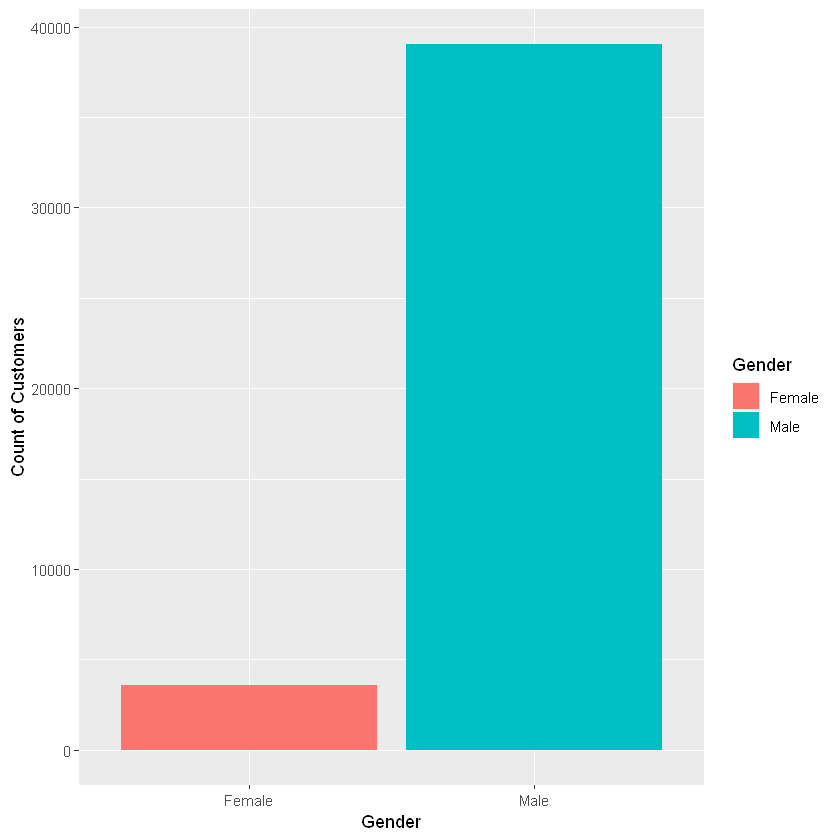

In [70]:
plot2 <- ggplot(Gender_new,aes(x = Gender, fill = Gender)) +
            geom_bar() +
               ylab("Count of Customers")

plot2

## PLOT3 (Player "LANGUAGE" Distribution Graph)

In [71]:
# Removing NA values from Language Description column
Language_new <- subset(Datamart, (!is.na(Datamart[,"LanguageName"])))

In [72]:
# Arranging Segments in Descending Order
Lang_arranged <- within(Language_new, 
                   LanguageName <- factor(LanguageName, 
                                      levels=names(sort(table(LanguageName), 
                                                        decreasing=TRUE))))

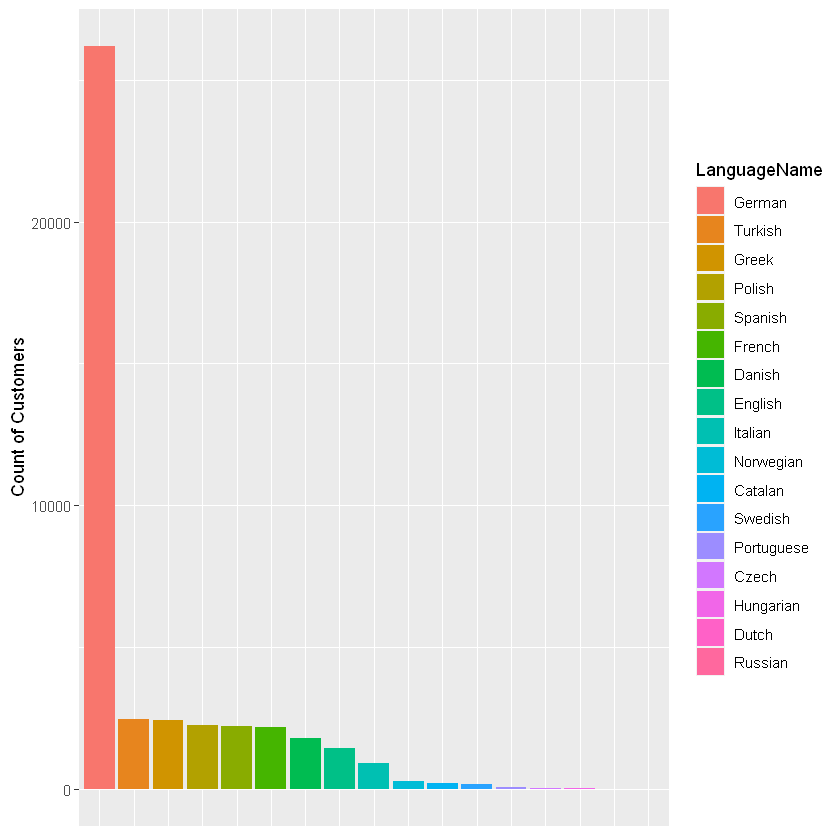

In [73]:
plot3 <- ggplot(Lang_arranged,aes(x = LanguageName, fill = LanguageName)) +
            geom_bar() +
               ylab("Count of Customers") + 
                    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

plot3

## PLOT4 (Player "COUNTRY" Distribution Graph)

In [74]:
# Removing NA values from Country column
Country_new <- subset(Datamart, (!is.na(Datamart[,"CountryName"])))

In [75]:
# Arranging Segments in Descending Order
Country_arranged <- within(Country_new, 
                   CountryName <- factor(CountryName, 
                                      levels=names(sort(table(CountryName), 
                                                        decreasing=TRUE))))

In [76]:
Country_arranged = head(Country_arranged,8)

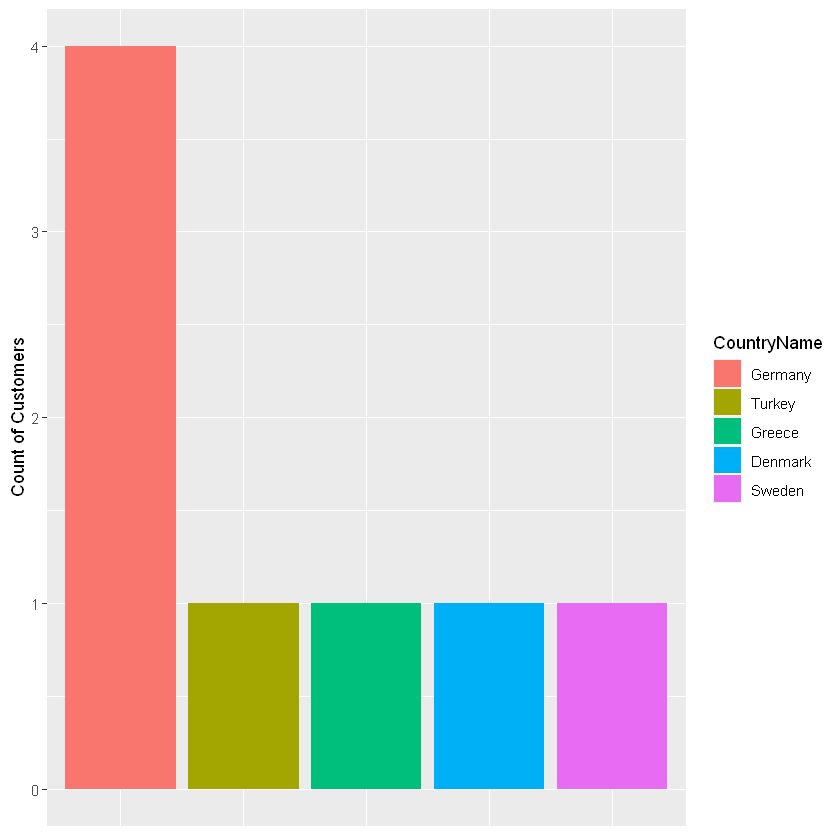

In [77]:
plot4 <- ggplot(Country_arranged, aes(x = CountryName, fill = CountryName)) +
            geom_bar() +
               ylab("Count of Customers") + 
                    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

plot4

## PLOT5 (Player "APPLICATION" Distribution Graph)

In [78]:
# Removing NA values from Application column
Application_new <- subset(Datamart, (!is.na(Datamart[,"ApplicationName"])))

In [79]:
# Arranging Segments in Descending Order
App_arranged <- within(Application_new, 
                   ApplicationName <- factor(ApplicationName, 
                                      levels=names(sort(table(ApplicationName), 
                                                        decreasing=TRUE))))

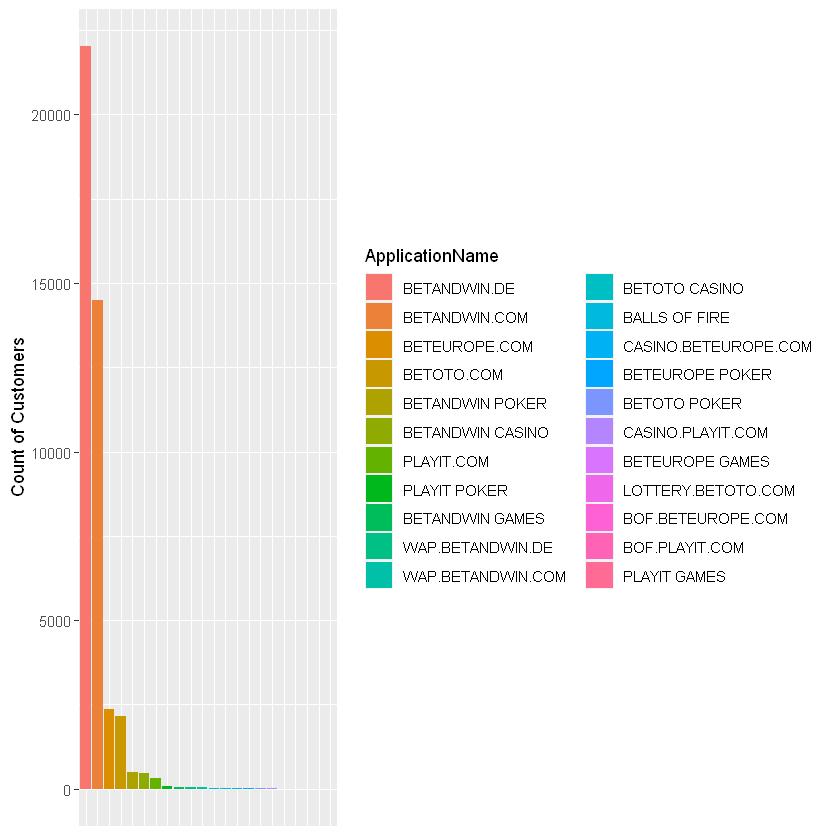

In [80]:
plot5 <- ggplot(App_arranged,aes(x = ApplicationName, fill = ApplicationName)) +
            geom_bar() +
               ylab("Count of Customers") + 
                      theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

plot5

## PLOT6 (Comparing "Customer Loyalty" with "Activation Period")

In [81]:
ActivationVsLoyalty <- Datamart %>%
                    filter (!is.na (Activation_Period), !is.na (Days_Ttl)) %>%
                        select (UserID, Activation_Period, Days_Ttl)

head(ActivationVsLoyalty,5)

UserID,Activation_Period,Days_Ttl
1324354,23 days,118
1324355,0 days,101
1324356,1 days,54
1324358,0 days,8
1324360,1 days,29


Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.


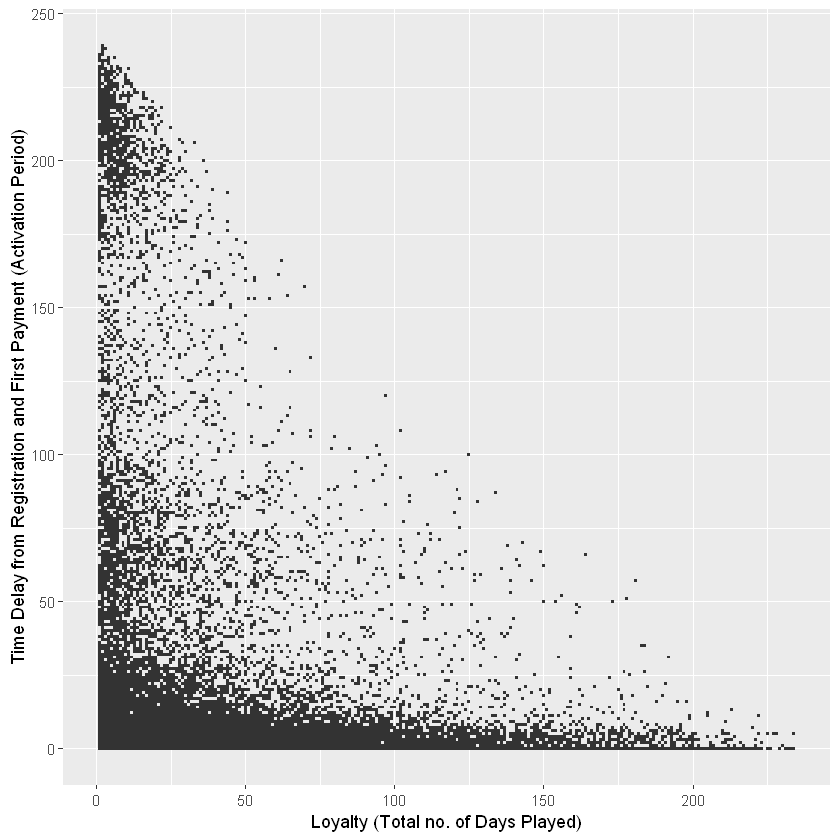

In [82]:
plot6 <- ggplot(ActivationVsLoyalty,aes(x = Days_Ttl, y = Activation_Period))+
             geom_tile() +
               xlab("Loyalty (Total no. of Days Played)") + 
               ylab("Time Delay from Registration and First Payment (Activation Period)")

plot6

## PLOT7 (Player "SEGEMENT" Distribution Graph)

In [83]:
# Removing all NA values 
Global_segments <- subset(Datamart, (!is.na(Datamart[,"Segments"])))

In [84]:
# Arranging Segments in Descending Order
Seg_arranged <- within(Global_segments, 
                   Segments <- factor(Segments, 
                                      levels=names(sort(table(Segments), 
                                                        decreasing=TRUE))))

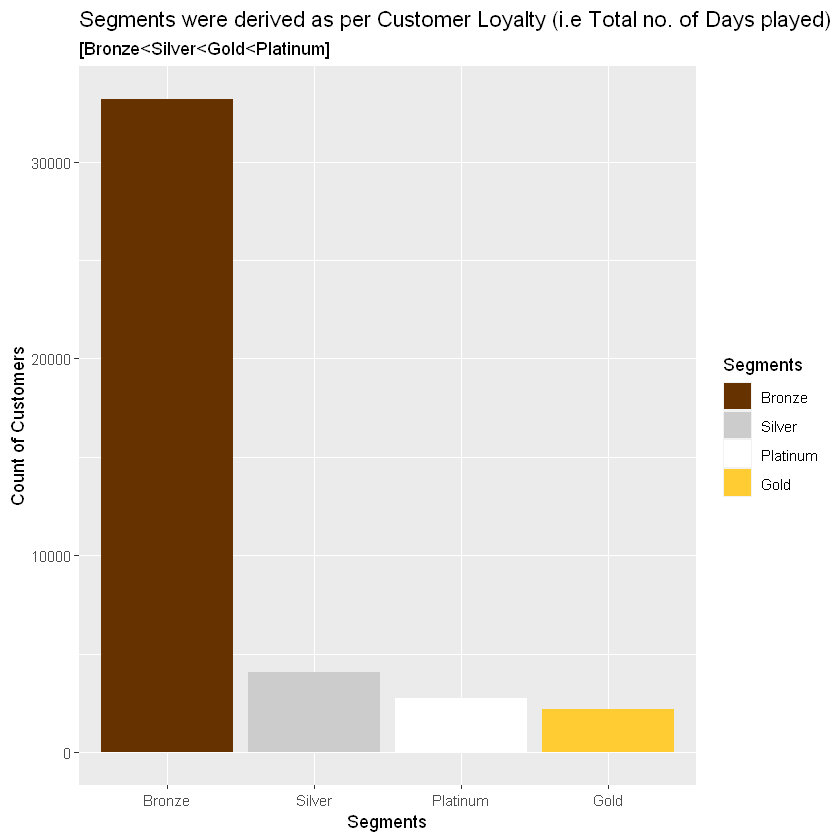

In [85]:
plot7 <- ggplot(Seg_arranged,aes(x = Segments, fill = Segments)) +
            geom_bar() + 
                scale_fill_manual(values = c("#663300", "#CCCCCC", "#FFFFFF", "#FFCC33")) + 
                    labs(title = "Segments were derived as per Customer Loyalty (i.e Total no. of Days played)", 
                         subtitle = "[Bronze<Silver<Gold<Platinum]",
                         x = "Segments", y = "Count of Customers") 

plot7

## PLOT8 (All  Products comparison for "BEST PLAY DAYS")

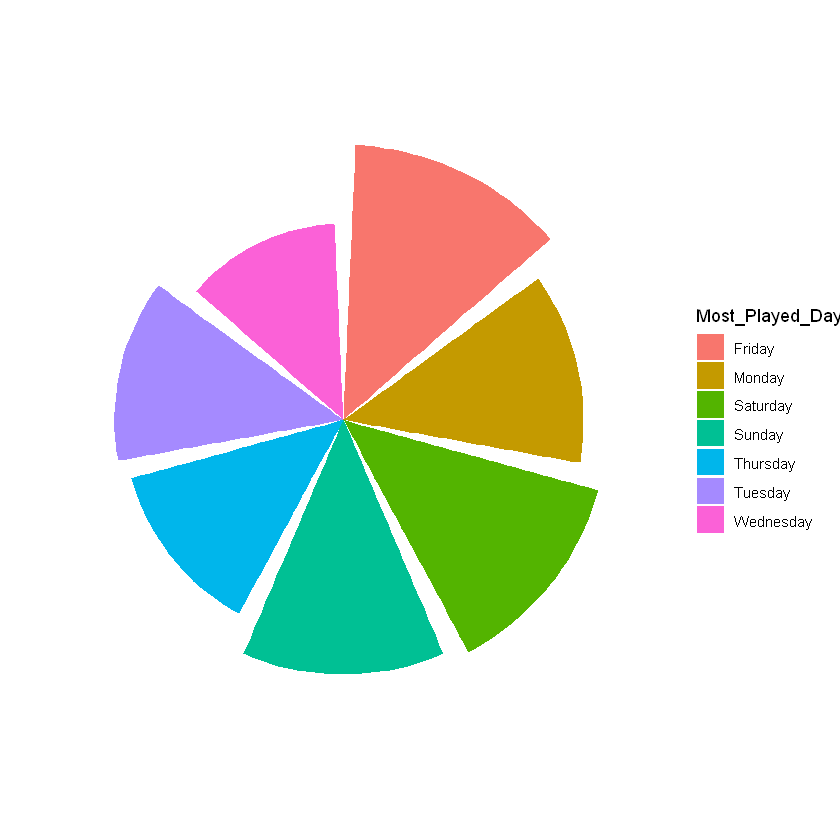

In [86]:
# FOR POKER

y <- Datamart %>%
filter (Most_Played_Day != 0) %>%
select (UserID, Most_Played_Day)

plot8.1 <-  ggplot(y,aes(x = Most_Played_Day, fill = Most_Played_Day)) +
          geom_bar() +
          coord_polar() +
          theme_void() 
plot8.1

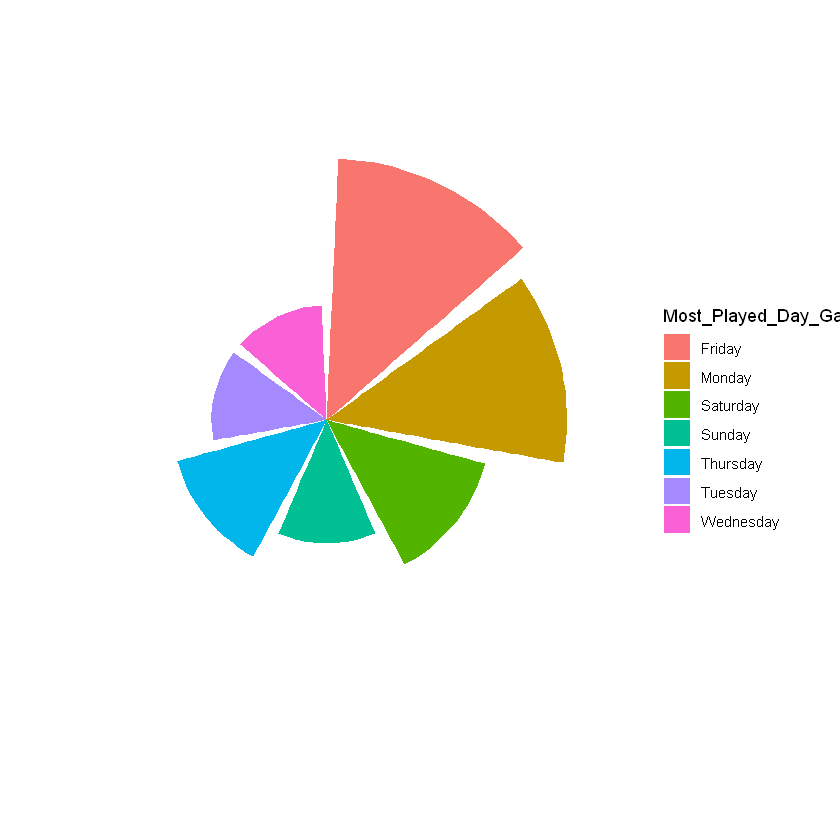

In [87]:
# FOR GAMES

y <- Datamart %>%
filter (Most_Played_Day_Ga != 0) %>%
select (UserID, Most_Played_Day_Ga)

plot8.2 <-  ggplot(y,aes(x = Most_Played_Day_Ga, fill = Most_Played_Day_Ga)) +
          geom_bar() +
          coord_polar() +
          theme_void() 
plot8.2

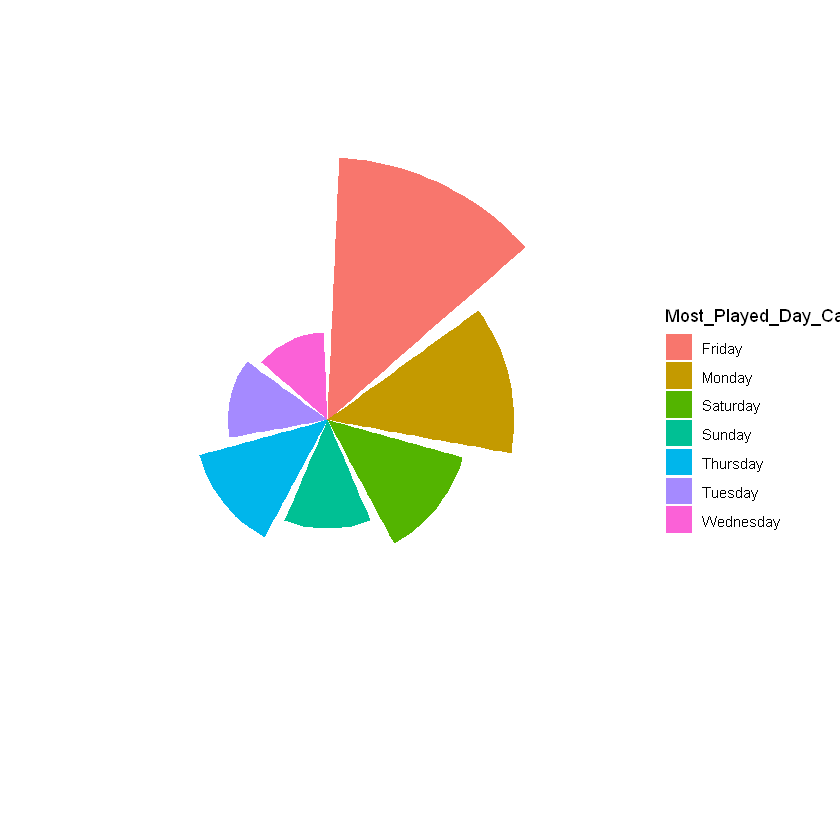

In [88]:
# FOR CASINO

y <- Datamart %>%
filter (Most_Played_Day_Ca != 0) %>%
select (UserID, Most_Played_Day_Ca)

plot8.3 <-  ggplot(y,aes(x = Most_Played_Day_Ca, fill = Most_Played_Day_Ca)) +
          geom_bar() +
          coord_polar() +
          theme_void() 
plot8.3

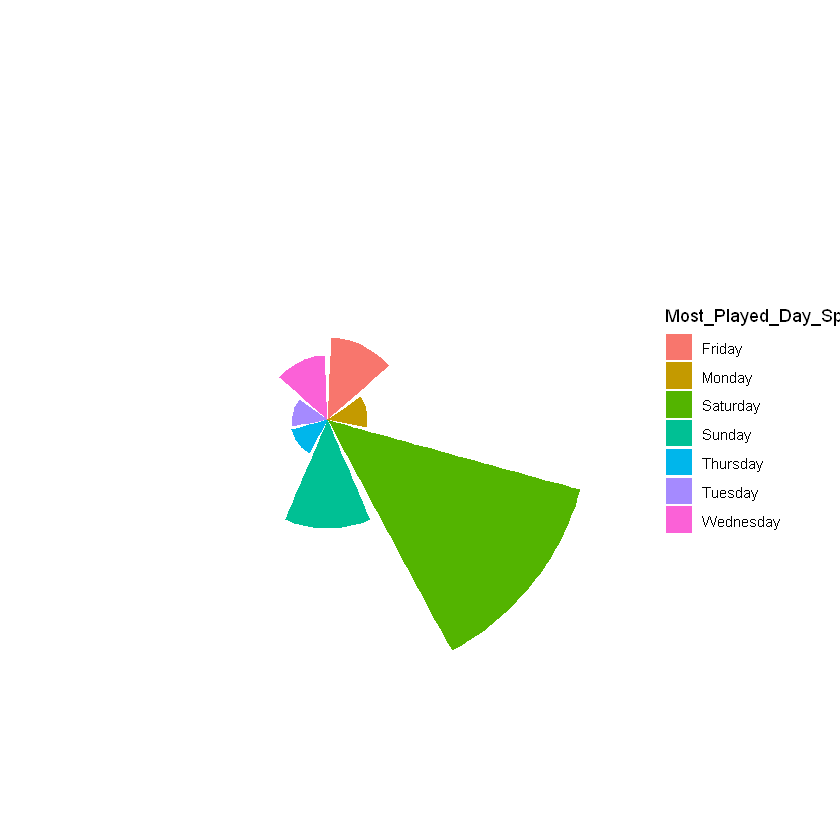

In [89]:
# FOR SPORTS

y <- Datamart %>%
filter (Most_Played_Day_Sp != 0) %>%
select (UserID, Most_Played_Day_Sp)

plot8.4 <-  ggplot(y,aes(x = Most_Played_Day_Sp, fill = Most_Played_Day_Sp)) +
          geom_bar() +
          coord_polar() +
          theme_void() 
plot8.4

## PLOT9 (All  Products comparison for "BEST PLAY MONTHS")

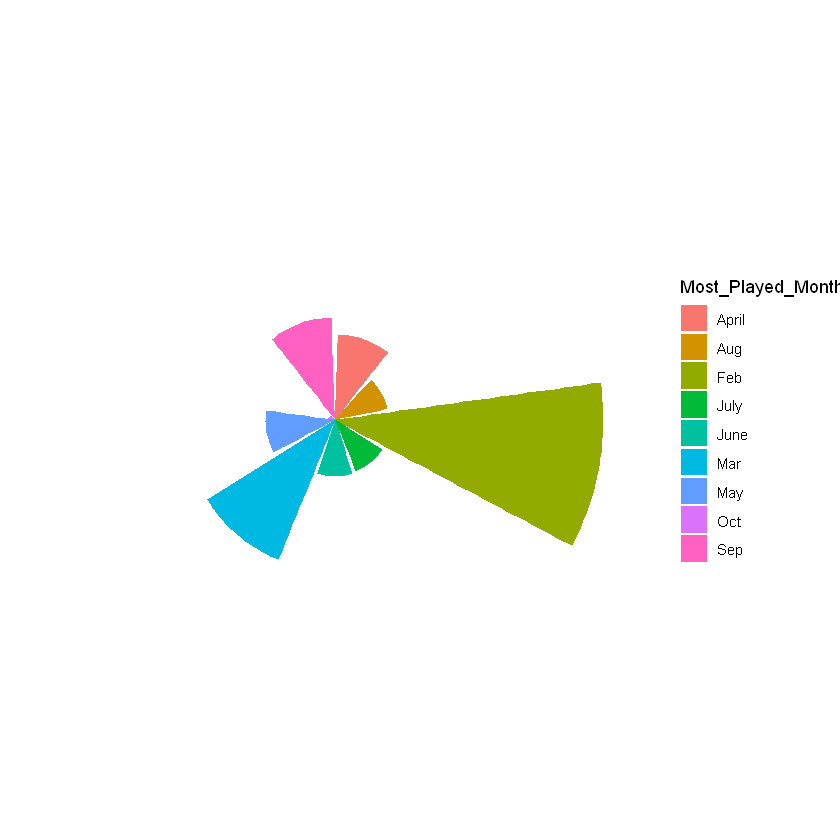

In [90]:
# For POKER

y <- Datamart %>%
filter (Most_Played_Month != 0) %>%
select (UserID, Most_Played_Month)


plot9.1 <-  ggplot(y,aes(x = Most_Played_Month, fill = Most_Played_Month)) +
          geom_bar() +
          coord_polar() +
          theme_void() 

plot9.1

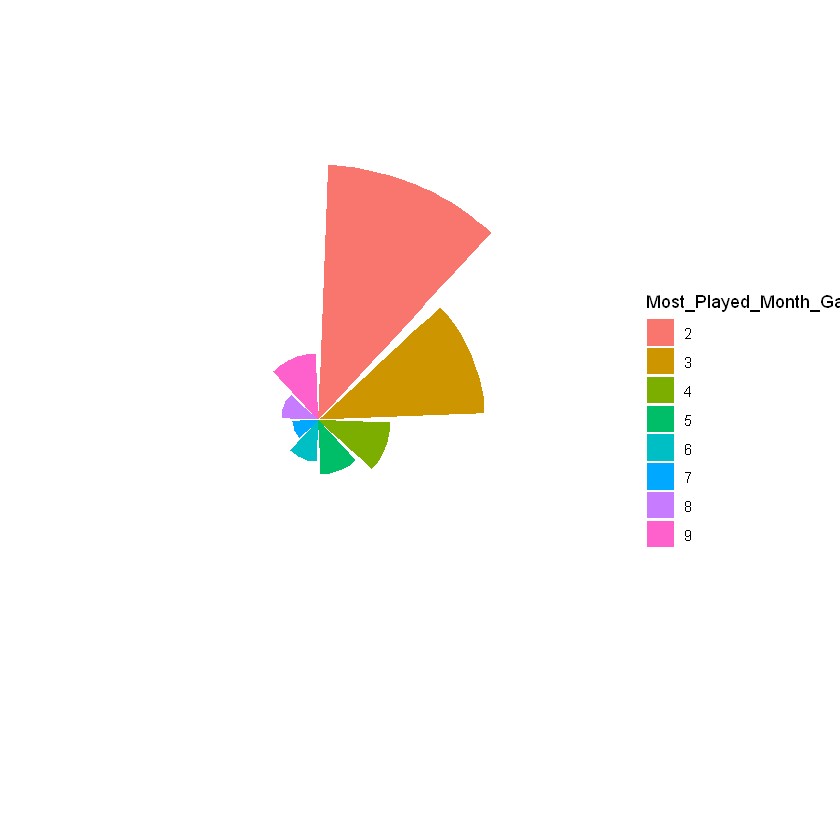

In [91]:
# For GAMES

y <- Datamart %>%
filter (Most_Played_Month_Ga != 0) %>%
select (UserID, Most_Played_Month_Ga)


plot9.2 <-  ggplot(y,aes(x = Most_Played_Month_Ga, fill = Most_Played_Month_Ga)) +
          geom_bar() +
          coord_polar() +
          theme_void()

plot9.2

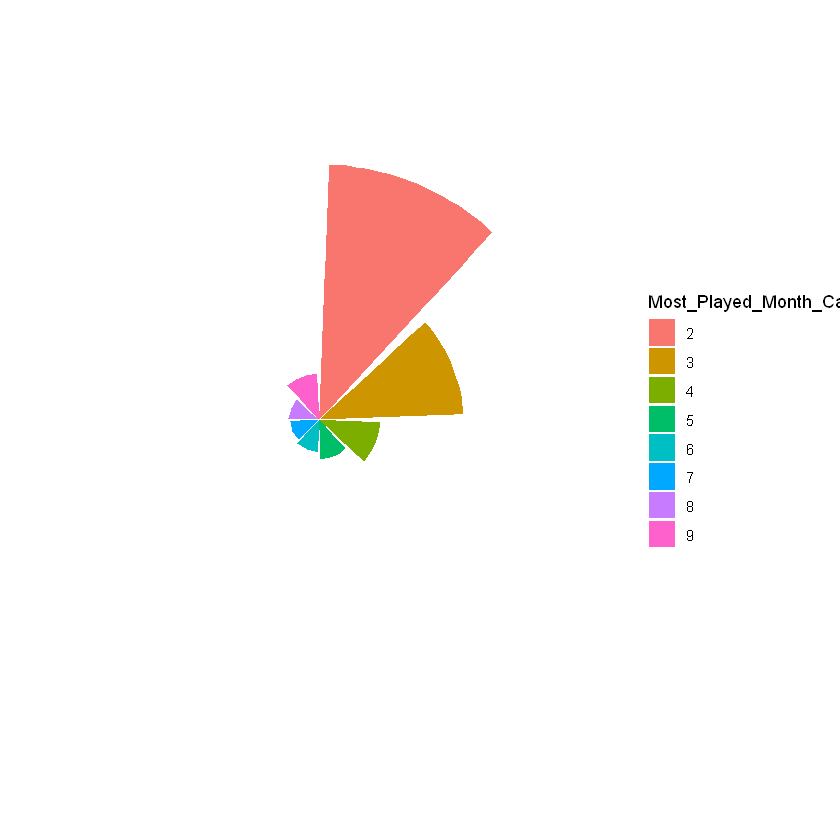

In [92]:
# For CASINO

y <- Datamart %>%
filter (Most_Played_Month_Ca != 0) %>%
select (UserID, Most_Played_Month_Ca)


plot9.3 <-  ggplot(y,aes(x = Most_Played_Month_Ca, fill = Most_Played_Month_Ca)) +
          geom_bar() +
          coord_polar() +
          theme_void()

plot9.3

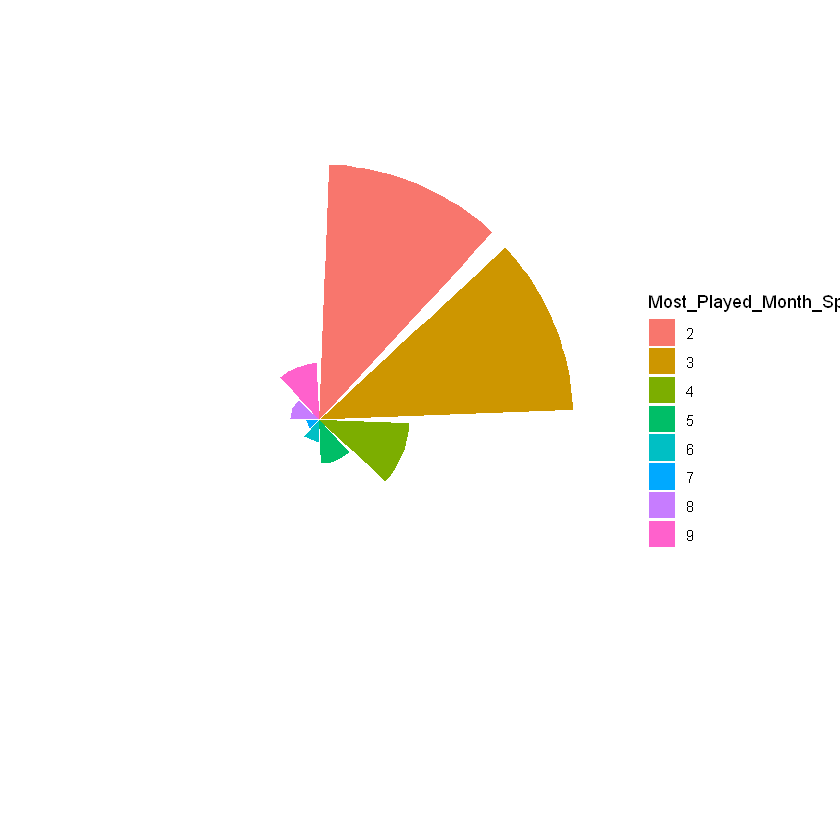

In [93]:
# For SPORTS

y <- Datamart %>%
filter (Most_Played_Month_Sp != 0) %>%
select (UserID, Most_Played_Month_Sp)


plot9.4 <-  ggplot(y,aes(x = Most_Played_Month_Sp, fill = Most_Played_Month_Sp)) +
          geom_bar() +
          coord_polar() +
          theme_void() 

plot9.4

## PLOT10 (GLOBAL MAPS - Global_Stakes, Global_Winnings, Global_Bets)

In [94]:
Global_Consumption <- as_tibble(Datamart)

Global_Consumption <-ddply(Global_Consumption,.(CountryName),summarize,
                                        Global_Stakes = sum(Ttl_Stakes),
                                        Global_Winnings = sum(Ttl_Winnings),
                                        Global_Bets = sum(Ttl_Bets),
                                       .drop = FALSE)

In [95]:
head(Global_Consumption,2)

CountryName,Global_Stakes,Global_Winnings,Global_Bets
Albania,34476.92,31251.26,12672
Andorra,4306.72,3947.73,1156


In [96]:
# Removing all the NA values
Global_Consumption <- subset(Global_Consumption, (!is.na(Global_Consumption[,2])))

In [97]:
head(Global_Consumption, 2)

CountryName,Global_Stakes,Global_Winnings,Global_Bets
Albania,34476.92,31251.26,12672
Andorra,4306.72,3947.73,1156


In [98]:
if(!require("rworldmap")) install.packages("rworldmap"); library("rworldmap")

# Create a map-shaped window
mapDevice('x11')

# Join to a coarse resolution map
spdf <- joinCountryData2Map(Global_Consumption, joinCode="NAME", nameJoinColumn="CountryName")

Loading required package: rworldmap
Loading required package: sp
### Welcome to rworldmap ###
For a short introduction type : 	 vignette('rworldmap')


53 codes from your data successfully matched countries in the map
8 codes from your data failed to match with a country code in the map
190 codes from the map weren't represented in your data


$colourVector
[1] "#FFFF80FF" "#FFFF00FF" "#FFCC00FF" "#FF9900FF" "#FF6600FF" "#FF3300FF"
[7] "#FF0000FF"

$cutVector
[1]     127.0562  621718.8167 1243310.5772 1864902.3377 2486494.0983
[6] 3108085.8588 3729677.6193 4351269.3798

$plottedData
  [1]           NA           NA   34476.9198     127.0562    6257.1495
  [6]           NA           NA           NA           NA           NA
 [11]           NA           NA           NA           NA           NA
 [16]           NA   28630.1433           NA     890.8200    5384.1914
 [21]           NA           NA           NA           NA           NA
 [26]           NA           NA           NA 4351269.3798           NA
 [31]           NA           NA           NA           NA           NA
 [36]     505.5400     788.5545           NA           NA  405609.5525
 [41]  590919.3426           NA           NA           NA           NA
 [46]           NA           NA           NA           NA           NA
 [51]    3737.2772           NA  243792.2648           NA           NA
 [56]           NA           NA           NA     744.2203           NA
 [61]           NA           NA           NA           NA           NA
 [66]   24093.9451           NA           NA           NA  803376.8153
 [71]           NA  185840.4546           NA           NA    2279.5500
 [76]           NA           NA    7169.0415   94047.3769           NA
 [81]           NA           NA   31068.0737           NA           NA
 [86]           NA           NA           NA           NA           NA
 [91]           NA   72352.6179           NA           NA           NA
 [96]           NA   46817.9038           NA    4041.6352    1411.9800
[101]           NA           NA     821.1200     960.8000           NA
[106]           NA           NA     153.0800           NA           NA
[111]           NA           NA           NA           NA           NA
[116]     325.2611           NA           NA           NA           NA
[121]     238.3500           NA           NA           NA           NA
[126]           NA           NA           NA    1320.8904           NA
[131]  864901.3567           NA           NA   23285.0576  200500.6727
[136]           NA           NA           NA           NA           NA
[141]           NA           NA           NA           NA           NA
[146]           NA           NA  336309.9406  277453.9362           NA
[151]           NA     426.4100           NA           NA    1726.8812
[156]           NA           NA           NA           NA           NA
[161]           NA    1352.6061           NA           NA     683.8871
[166]     286.7811           NA           NA           NA     138.1200
[171]           NA           NA           NA   40896.5742           NA
[176]           NA           NA           NA           NA    4306.7200
[181]           NA           NA           NA           NA           NA
[186]    6977.0531           NA           NA           NA           NA
[191]           NA           NA           NA           NA           NA
[196]           NA           NA           NA           NA           NA
[201]           NA           NA           NA           NA           NA
[206]           NA           NA           NA           NA   96228.9592
[211]           NA           NA     463.5000           NA           NA
[216]   17748.2035           NA           NA     840.8807    1897.4854
[221]           NA           NA     168.1970           NA           NA
[226]     959.9700           NA           NA           NA           NA
[231]           NA           NA           NA           NA           NA
[236]           NA           NA           NA    4290.4409           NA
[241]           NA           NA           NA

$catMethod
[1] "fixedWidth"

$colourPalette
[1] "heat"

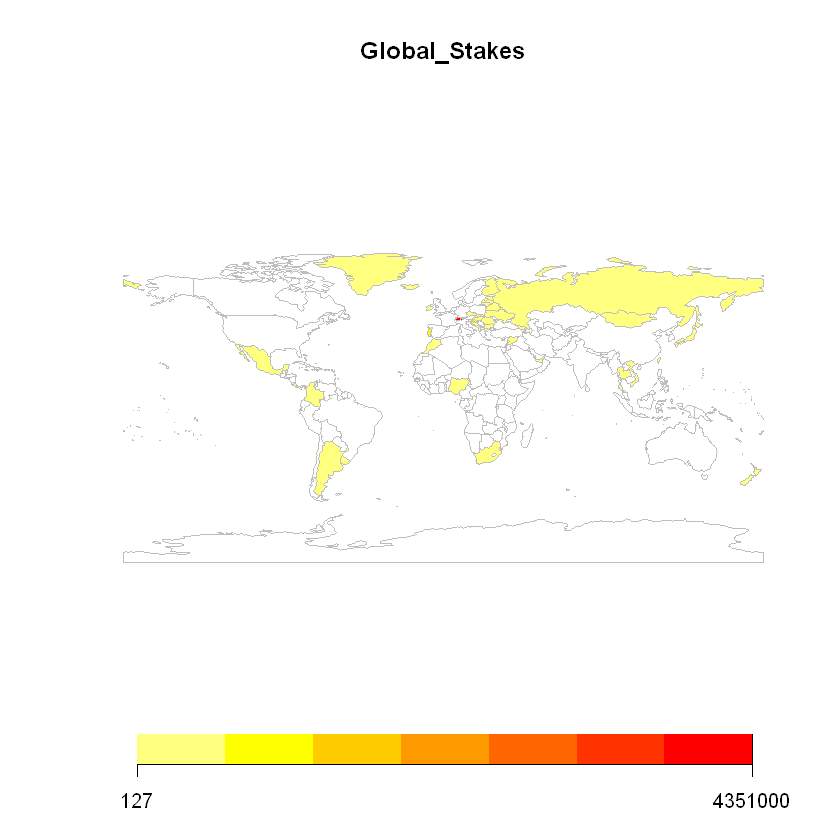

In [99]:
plot10.1 <- mapCountryData(spdf, nameColumnToPlot="Global_Stakes", catMethod="fixedWidth")

plot10.1

$colourVector
[1] "#FFFF80FF" "#FFFF00FF" "#FFCC00FF" "#FF9900FF" "#FF6600FF" "#FF3300FF"
[7] "#FF0000FF"

$cutVector
[1]      53.53  588888.73 1177723.94 1766559.14 2355394.35 2944229.55 3533064.75
[8] 4121899.96

$plottedData
  [1]           NA           NA   31251.2600      85.7500    6890.0794
  [6]           NA           NA           NA           NA           NA
 [11]           NA           NA           NA           NA           NA
 [16]           NA   24109.7079           NA     716.1400    5499.3659
 [21]           NA           NA           NA           NA           NA
 [26]           NA           NA           NA 4121899.9564           NA
 [31]           NA           NA           NA           NA           NA
 [36]     405.5400     482.2793           NA           NA  383330.2951
 [41]  588404.7173           NA           NA           NA           NA
 [46]           NA           NA           NA           NA           NA
 [51]    3717.2737           NA  247980.2338           NA           NA
 [56]           NA           NA           NA     753.9798           NA
 [61]           NA           NA           NA           NA           NA
 [66]   22541.2010           NA           NA           NA  797203.8189
 [71]           NA  178632.6375           NA           NA    1322.4700
 [76]           NA           NA    6573.4000   91530.5540           NA
 [81]           NA           NA   29856.0233           NA           NA
 [86]           NA           NA           NA           NA           NA
 [91]           NA   74714.6813           NA           NA           NA
 [96]           NA   50040.1036           NA    5777.7599     762.6800
[101]           NA           NA     742.1200    1020.6500           NA
[106]           NA           NA      53.5300           NA           NA
[111]           NA           NA           NA           NA           NA
[116]     238.1810           NA           NA           NA           NA
[121]     205.2000           NA           NA           NA           NA
[126]           NA           NA           NA    1226.1600           NA
[131]  786904.6426           NA           NA   23706.3968  215201.6782
[136]           NA           NA           NA           NA           NA
[141]           NA           NA           NA           NA           NA
[146]           NA           NA  324512.2224  266140.9758           NA
[151]           NA     401.4100           NA           NA    1757.0162
[156]           NA           NA           NA           NA           NA
[161]           NA    1657.5877           NA           NA     663.2967
[166]     199.4892           NA           NA           NA     157.7800
[171]           NA           NA           NA   43188.2146           NA
[176]           NA           NA           NA           NA    3947.7300
[181]           NA           NA           NA           NA           NA
[186]    6266.8672           NA           NA           NA           NA
[191]           NA           NA           NA           NA           NA
[196]           NA           NA           NA           NA           NA
[201]           NA           NA           NA           NA           NA
[206]           NA           NA           NA           NA   87099.8431
[211]           NA           NA     314.1800           NA           NA
[216]   17785.9399           NA           NA     840.1359    3388.6188
[221]           NA           NA      96.3575           NA           NA
[226]     409.9700           NA           NA           NA           NA
[231]           NA           NA           NA           NA           NA
[236]           NA           NA           NA    3520.4158           NA
[241]           NA           NA           NA

$catMethod
[1] "fixedWidth"

$colourPalette
[1] "heat"

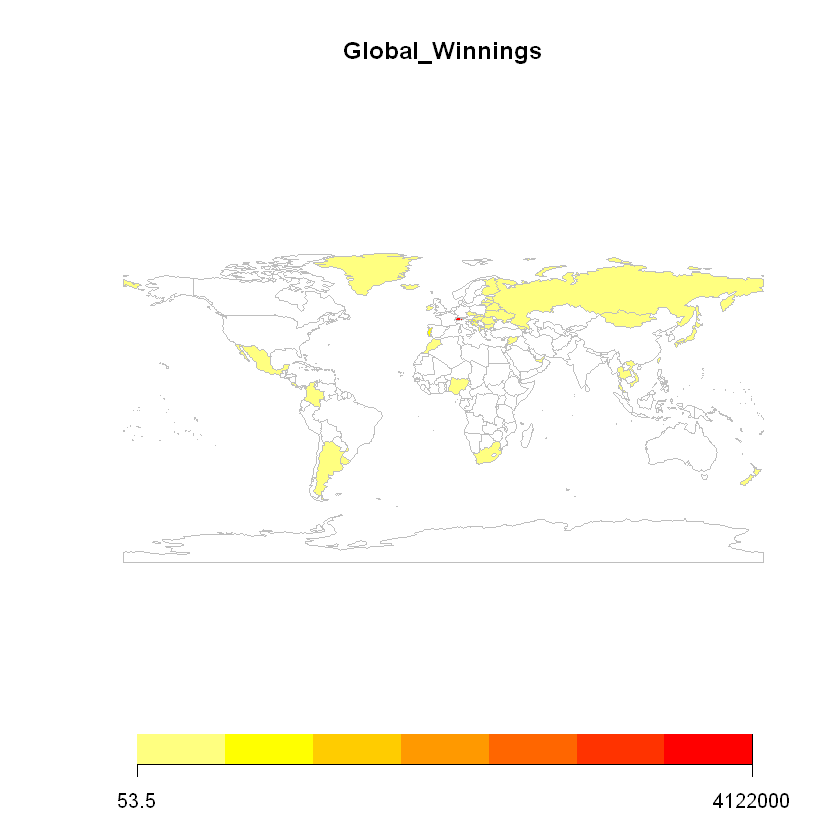

In [100]:
plot10.2 <- mapCountryData(spdf, nameColumnToPlot="Global_Winnings", catMethod="fixedWidth")

plot10.2

$colourVector
[1] "#FFFF80FF" "#FFFF00FF" "#FFCC00FF" "#FF9900FF" "#FF6600FF" "#FF3300FF"
[7] "#FF0000FF"

$cutVector
[1]      4.00  68730.29 137456.57 206182.86 274909.14 343635.43 412361.71
[8] 481088.00

$plottedData
  [1]     NA     NA  12672    119   1871     NA     NA     NA     NA     NA
 [11]     NA     NA     NA     NA     NA     NA   9683     NA    663    268
 [21]     NA     NA     NA     NA     NA     NA     NA     NA 481088     NA
 [31]     NA     NA     NA     NA     NA     28    129     NA     NA  45619
 [41]  23473     NA     NA     NA     NA     NA     NA     NA     NA     NA
 [51]   1929     NA  11509     NA     NA     NA     NA     NA     79     NA
 [61]     NA     NA     NA     NA     NA   3194     NA     NA     NA  51568
 [71]     NA  27595     NA     NA    111     NA     NA    136   2244     NA
 [81]     NA     NA   1132     NA     NA     NA     NA     NA     NA     NA
 [91]     NA    659     NA     NA     NA     NA   1975     NA    136     78
[101]     NA     NA    424     77     NA     NA     NA     24     NA     NA
[111]     NA     NA     NA     NA     NA    306     NA     NA     NA     NA
[121]    229     NA     NA     NA     NA     NA     NA     NA     65     NA
[131] 127196     NA     NA   7224   2719     NA     NA     NA     NA     NA
[141]     NA     NA     NA     NA     NA     NA     NA  27658  34056     NA
[151]     NA    126     NA     NA     30     NA     NA     NA     NA     NA
[161]     NA     37     NA     NA    379    131     NA     NA     NA      4
[171]     NA     NA     NA   1953     NA     NA     NA     NA     NA   1156
[181]     NA     NA     NA     NA     NA    308     NA     NA     NA     NA
[191]     NA     NA     NA     NA     NA     NA     NA     NA     NA     NA
[201]     NA     NA     NA     NA     NA     NA     NA     NA     NA  11843
[211]     NA     NA    243     NA     NA   5409     NA     NA    108    250
[221]     NA     NA    124     NA     NA     36     NA     NA     NA     NA
[231]     NA     NA     NA     NA     NA     NA     NA     NA    158     NA
[241]     NA     NA     NA

$catMethod
[1] "fixedWidth"

$colourPalette
[1] "heat"

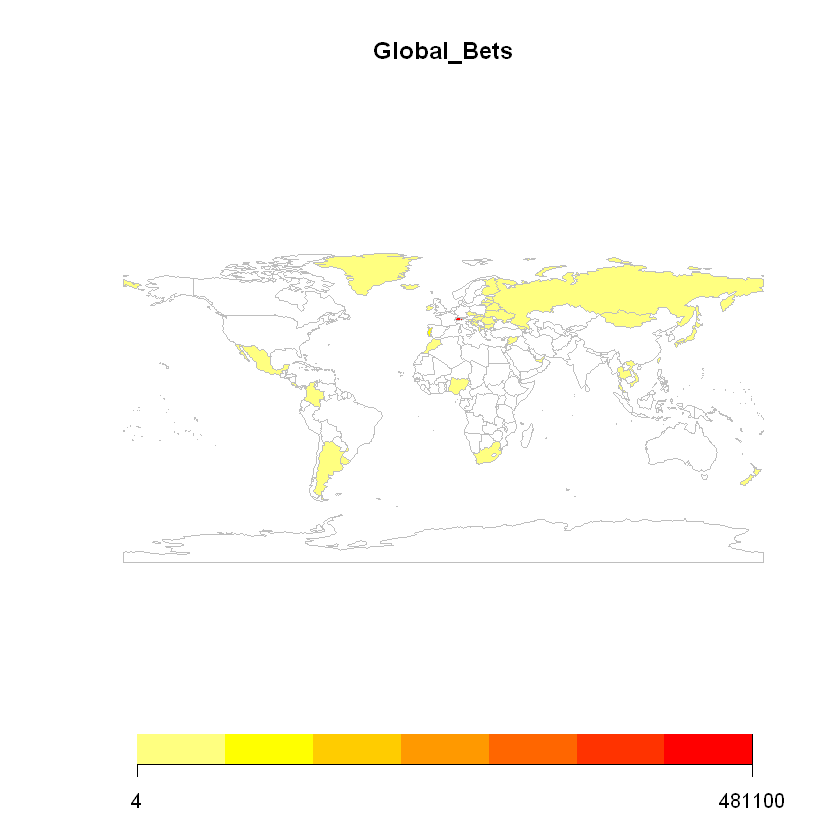

In [101]:
plot10.3 <- mapCountryData(spdf, nameColumnToPlot="Global_Bets", catMethod="fixedWidth")

plot10.3